# EXERCISE 4

## Task: Plot bar charts of histograms of any three different distributions listed at the following [link](https://numpy.org/doc/stable/reference/random/generator.html#distributions).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import webbrowser as wp

### Triangular Distribution

The triangular distribution is a continuous distribution that accepts three compulsory parameters:

- `left` determines the minimum value within the dataset;
- `mode` determines the most common value found within the dataset;
- `right` determines the maximum value.
    
  A fourth parameter, `size` is effectively compulsory as it defaults to 1, with the following result:

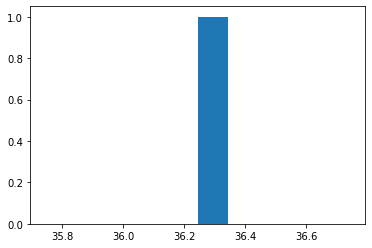

In [2]:
rng = np.random.default_rng()
vals = rng.triangular(left=-1000,mode=650,right=1000)
plt.hist(vals)
plt.show()

As can be seen above, the triangular distribution function returns a single column of data made up of a single number, if `size` is omitted as a parameter. I include this as an example of an error I made in not reading the documentation properly. When included, the below is produced:

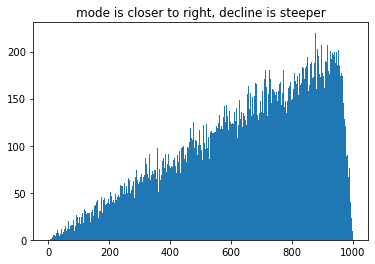

In [3]:
# defining the lowest, modal and maximum values of the dataset
left = 0
mode = 958
right = 1000

# assigning a variable to the difference between the elements above
incline = mode - left
decline = right - mode

# a loop that works out whether the mode is closer to the minimum or maximum value
if decline > incline:
    steep = "mode is closer to left, incline is steeper"
if decline < incline:
    steep = "mode is closer to right, decline is steeper"
else:
    steep = "mode equals median value, incline and decline are the same"

# in this part of the code I've plugged the triangular distribution into sample code provided in the lecture
rng = np.random.default_rng()
vals = rng.triangular(left=left,mode=mode,right=right,size=100000)
plt.hist(vals, bins=1000)
# using the output of the loop above to create a title
plt.title(steep)
plt.show()


The `mode` parameter effectively acts as a pivot on the shape of the dataset; if the value of `left` subtracted from `mode` is greater than `mode` subtracted from `right`, then a steeper incline will be produced. If the latter value is greater, than a decline that is steeper than the incline will be produced, and if the modal value is also the median value, this is known as [symmetrical triangular distribution](https://en.wikipedia.org/wiki/Triangular_distribution#Symmetric_triangular_distribution).

### Multinomial Distribution
The multinomial distribution is a discrete distribution similar to the binomial distribution, but generates experiments with more than two outcomes. The [NumPy documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multinomial.html) lists a sequence of dice as the classic example of this. The parameters for this function are:

- `n`, the number of experiments to perform;
- `pvals`, the probability of each outcome occurring;
- `size`, the number of times `n` should be repeated.

To demonstrate this in a plot, I chose as an example of,

    "if a dice is rolled in 1000 sequences of 10 rolls, how many times would a sequence sum up to a particular value?"
    
It took me far too long messing around with loops and lists to achieve this, and there is almost certainly a more efficient way to write this, but it feels beneficial.

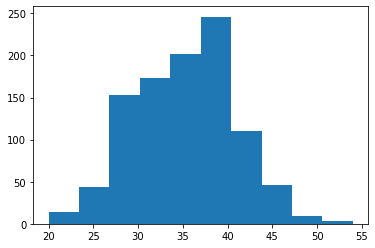

In [37]:
# this portion of the code is taken from the numPy documentation for binomial distribution to replicate dice rolls
rng = np.random.default_rng()
# the parameters here translate to: roll a dice ten times, and repeat this 20 times, in which each of the six
# outcomes has an equal chance of occurring.
arrs = rng.multinomial(10,[1/6.]*6,size=1000)
# the loop here is something I came up with by reading through an article by Euan Russano in the README, and then 
# going off the deep-end. Firstly assigns a count variable to count through the arrays, as well as adding an empty
# list to store the sum of each roll in each array. Finally uses an empty list to store total sum of each sequence.
count = 0
val_by_dot = []
sum_of_arr = []

for arr in arrs:
    # counts through the sequence, assigns a number to each array
    count = count + 1
    # counts through the array, assigns a number to each roll, resets to zero after each array
    count_roll = 0
    # list to house values of each sequence
    value_array = []
    for i in arr:
        # adds 1 to roll count
        count_roll = count_roll + 1
        # multiplies number of rolls by that dice value
        value = i * count_roll
        value_array.append(value)
    # error was here, I added the append inside the roll loop, not the array loop!
    val_by_dot.append(value_array)

for item in val_by_dot:
    item_sum = sum(item)
    sum_of_arr.append(item_sum)
    
# histogram to display the number of times each sum is returned
plt.hist(sum_of_arr)
plt.show()

# Printed below just for various spot checks and tests
# print("Results of Rolls")
# print(arrs)
# print("Values by Dot")
# print(val_by_dot)
# print(f'Sum of Values: {sum_of_arr}')


### Chi-Squared Distribution

The Chi-Squared Distribution is a continuous distribution that is often used for hypothesis testing. The key component of this distribution is the variable commonly expressed as _k_, which represents the degree of freedom. My limited understanding, derived from a post on [Statistics by Jim](https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/) is that:

    DF encompasses the notion that the amount of independent information you have limits the number of parameters that you can estimate.
    
I interpret this to mean as introducing complexity into multivariate variables, but I'm at a loss as to how that works when each item I'm plotting is a random scalar values. My best guess is that in the functions below, if the _df_ variable is set at 150, and the _size_ is set at 1000, it means that 850 other items in are constrained to the mean of those 150 'free' values.
    
In the example below, the `chisquare` function takes in two variables, _df_ and _size_, the latter again being the number of datapoints in the range. The _df_ variable represents the degrees of freedom, a concept I still don't fully understand despite going down a [rabbit hole](https://www.scribbr.com/statistics/chi-square-distributions/) with. I've used the `subplots` function within [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) to express various _df_ values, with the aim of replicating the behaviour of of the initial plots on the [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_distribution) page, and trying to better understand the degree of freedom concept.

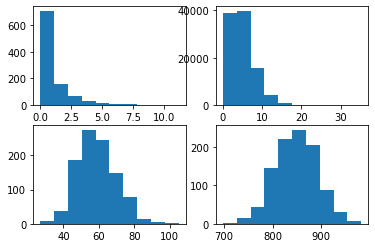

In [36]:
cs_rng = np.random.default_rng()
# I set a corresponding range for each degree-of-freedom value
cs_val_1 = cs_rng.chisquare(df=1,size=1000)
cs_val_9 = cs_rng.chisquare(df=9,size=1000)
cs_val_59 = cs_rng.chisquare(df=59,size=1000)
cs_val_850 = cs_rng.chisquare(df=850,size=1000)

# the subplot function creates a grid using the first two parameters as the number of rows and columns in that grid,
# the final parameter states which subplot within the grid the following plot occupies, starting from the top-left (1)
# and ending at bottom-right (4).
plt.subplot(2,2,1)
plt.hist(cs_val_1)
plt.subplot(2,2,2)
plt.hist(cs_val_5)
plt.subplot(2,2,3)
plt.hist(cs_val_59)
plt.subplot(2,2,4)
plt.hist(cs_val_850)
plt.show()


### Ending Notes

I abandoned attempts at plotting the hypergeometric, Pareto and Zipf's distributions as I was missing some understanding of how the functions worked with randomly-generated data. I'll be revisiting this in a separate notebook outside of this exercise file to try and get to grips with how these functions work.